Total points for this HW: 100.
Due date: 02/20/2020 (at the start of class)

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

**Predicting where to allocate  city resources like which neighborhood would benefit the most from free clinics would need to be interpretable because in any case where cities have to make choices as to who gets resources and who doesn't, cities need to demonstrate that their constituents that their ML models are not just perpetuating biases and are acting in a more efficient way**

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

**The issue of predicting the weather is an example of where we want to maximize accuracy over interpretability. When cities are faced with weather events, like snowstorms, it is paramount that city officials can quickly mobilize city resources to areas that will be most affected by the weather events. Without accuracy, cities risk wasting critical resources on neighborhoods of low risk or on weather events that never happened (like salting roads when the snow storm turns to be just rain, which costs money).**

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

**If you would like both interpretability and accuracy, you could go ahead and get build an optimized random forest classifier, and to get a measure of feature important (for interpretability) you can calculate the Gini importance per feature across all the trees in the random forest. These measurements can then be used to understand the importance of each feature when it comes to making a decision; however, this measurement is biased against discrete variables of few distinct values.**

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# from StringIO import StringIO
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import StringIO ## for Python 3

thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)

print('MPG: ',list(df['MPG'].unique()))
print('cylinders: ', list(df['cylinders'].unique()))
print('HP: ', list(df['HP'].unique()))
print('weight: ', list(df['weight'].unique()))
df

MPG:  ['good', 'bad']
cylinders:  [4, 6, 8]
HP:  [75, 90, 110, 175, 95, 94, 139, 190, 145, 100, 92, 170, 89, 65, 85, 81, 93]
weight:  ['light', 'medium', 'weighty']


,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
mpg_mode = df[['MPG']].mode().iloc[0]['MPG']
print("Most common MPG value is: ", mpg_mode)

Most common MPG value is:  bad


In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [5]:
def enumarate_discrete_partitions(df, columns): 
    results = []
    for column in columns:
        for value in df[column].unique():
            Y = df[df[column] == value]
            N = df[df[column] != value]
            result = { 
                'split': column,
                'value': value,
                'YGood': len(Y[Y['MPG'] == 'good']),
                'YBad': len(Y[Y['MPG'] == 'bad']),
                'NGood': len(N[N['MPG'] == 'good']),
                'NBad': len(N[N['MPG'] == 'bad'])
            }
            results.append(result)
    return results

In [6]:
partitions = enumarate_discrete_partitions(df, ['cylinders','weight'])
partitions = pd.DataFrame(partitions)   
partitions['gain'] = partitions.apply (lambda row: InformationGain(row['YGood'],row['YBad'],row['NGood'],row['NBad']), axis=1)
print("Enumerations for discrete-valued variables: ")
partitions.head(10)

Enumerations for discrete-valued variables: 


,split,value,YGood,YBad,NGood,NBad,gain
0,cylinders,4,5,4,0,11,0.365294
1,cylinders,6,0,6,5,9,0.153078
2,cylinders,8,0,5,5,10,0.122556
3,weight,light,3,3,2,12,0.097107
4,weight,medium,2,6,3,9,0.000000
5,weight,weighty,0,6,5,9,0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [7]:
def enumarate_continous_partitions(df, column): 
    #get midpoints
    vals = list(df[column])
    vals.sort()
    midpoints = set()
    for i in range(1,len(vals)):
        midpoints.add( (vals[i] + vals[i-1]) / 2 )
    midpoints = list(midpoints)
    midpoints.sort()
    
    results = []
    for value in midpoints:
        Y = df[df[column] > value]
        N = df[df[column] <= value]
        result = { 
            'split': column,
            'value': value,
            'YGood': len(Y[Y['MPG'] == 'good']),
            'YBad': len(Y[Y['MPG'] == 'bad']),
            'NGood': len(N[N['MPG'] == 'good']),
            'NBad': len(N[N['MPG'] == 'bad'])
        }
        results.append(result)
    return results

In [8]:
temp = enumarate_continous_partitions(df, 'HP')
temp = pd.DataFrame(temp)   
temp['gain'] = temp.apply (lambda row: InformationGain(row['YGood'],row['YBad'],row['NGood'],row['NBad']), axis=1)

partitions = partitions.append(temp, ignore_index=True)
partitions.head(10)

,split,value,YGood,YBad,NGood,NBad,gain
0,cylinders,4,5,4,0,11,0.365294
1,cylinders,6,0,6,5,9,0.153078
2,cylinders,8,0,5,5,10,0.122556
3,weight,light,3,3,2,12,0.097107
4,weight,medium,2,6,3,9,0.000000
5,weight,weighty,0,6,5,9,0.153078
6,HP,70,4,15,1,0,0.105915
7,HP,78,3,15,2,0,0.226258
8,HP,83,2,15,3,0,0.367103
9,HP,87,2,14,3,1,0.214171


In [9]:
partitions.sort_values(by=['gain'],ascending=False, inplace=True)
print("The first most optimal binary split: ")
first_node = partitions[partitions['gain'] == partitions['gain'].max()][0:1]
first_node

The first most optimal binary split: 


,split,value,YGood,YBad,NGood,NBad,gain
12,HP,92.5,0,13,5,2,0.509186


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

**The optimal split according to parts B and C would be **HP > 92.5**
This split creates two nodes: 
**
* \>  92.5  HP --> 00 Good and 13 Bad
* <=92.5 HP --> 05 Good and 02 Bad

**Of the two nodes created, the node where HP <=92.5 could be further split as there's still a mix of both good/bad MPG vehicles.**

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [10]:
## Get entries whose HP <= 92.5
df_remaining = df[df[first_node['split'].values[0]] <= first_node['value'].values[0]]
df_remaining

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


In [11]:
results = []
results += enumarate_discrete_partitions(df_remaining, ['cylinders','weight'])
results += enumarate_continous_partitions(df_remaining, 'HP')

results = pd.DataFrame(results)   
results['gain'] = results.apply (lambda row: InformationGain(row['YGood'],row['YBad'],row['NGood'],row['NBad']), axis=1)
results.sort_values(by=['gain'],ascending=False, inplace=True)

second_node = results[results['gain'] == results['gain'].max()][0:1]
print("The second (and last) most optimal binary split (group where HP <= 92.5): ")
second_node

The second (and last) most optimal binary split (group where HP <= 92.5): 


,split,value,YGood,YBad,NGood,NBad,gain
0,cylinders,4,5,0,0,2,0.863121


f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Populating the interactive namespace from numpy and matplotlib


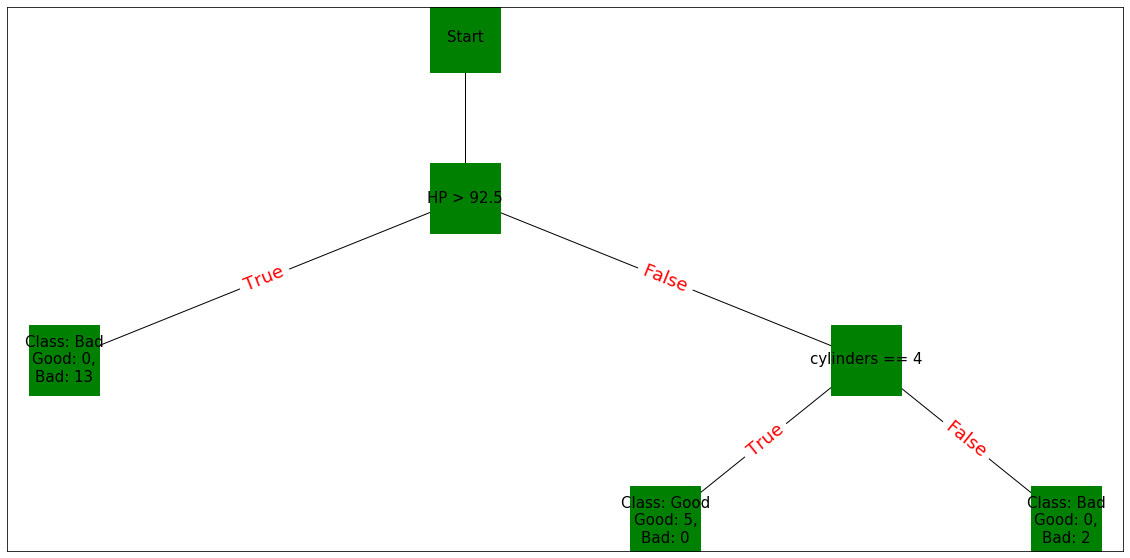

In [12]:
import networkx as nx 
import matplotlib.pyplot as plt
%pylab inline 

G=nx.Graph()

root = "Start"
cond1 = first_node['split'].values[0] + " > " + str(first_node['value'].values[0])
cond2 = second_node['split'].values[0] + " == " + str(second_node['value'].values[0])
yes1 = "Class: Bad\nGood: {},\nBad: {}".format(first_node['YGood'].values[0], first_node['YBad'].values[0])
yes2 =  "Class: Good\nGood: {},\nBad: {}".format(second_node['YGood'].values[0], second_node['YBad'].values[0])
no2 = "Class: Bad\nGood: {},\nBad: {}".format(second_node['NGood'].values[0], second_node['NBad'].values[0])

G.add_nodes_from([root, cond1, yes1, cond2, yes2, no2])
G.add_edges_from([(root,cond1),(cond1,yes1),(cond1,cond2),(cond2,yes2),(cond2,no2)])

plt.figure(figsize = (20,10))

pos={root:(5,10),cond1:(5,8), yes1:(3,6), cond2:(7,6), yes2: (6,4), no2:(8,4)}
nx.draw_networkx(G,pos,arrows=True, with_labels=True, node_color='green',
                 node_size =5000, font_size=15, node_shape='s')
nx.draw_networkx_edge_labels(G,pos,
                             edge_labels={(cond1,yes1):'True', (cond1,cond2):'False',(cond2,yes2):'True',(cond2,no2):'False'},
                             font_color='red',font_size=18)

plt.show()

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,4,70,light     **GOOD**

?,6,113,medium   **BAD**

?,6,83,weighty   **BAD**

?,4,95,weighty   **BAD** 


### Question 3, Predicting burden of disease （40 pts)

In [13]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

features = data.columns[1:len(data.columns)-1]
target = data.columns[len(data.columns)-1:len(data.columns)]

x_train, x_test, y_train, y_test = train_test_split(data[features], 
                                                    data[target] , 
                                                    test_size=0.30, 
                                                    random_state=1993)

In [15]:
accuracies = []
param = 'max_leaf_nodes'

leaf_range = range(2,20)
for i in leaf_range:
    dt = DecisionTreeClassifier(max_leaf_nodes = i)
    dt.fit(x_train, y_train)

    accuracies.append({param: i, 
                       'IS_score': dt.score(x_train,y_train), 
                       'OS_score': dt.score(x_test, y_test), 
                       'Leaf Number': dt.get_n_leaves()
                      })

In [16]:
disease_tree = pd.DataFrame(accuracies)   
disease_tree.head(100)

,max_leaf_nodes,IS_score,OS_score,Leaf Number
0,2,0.527473,0.307692,2
1,3,0.659341,0.487179,3
2,4,0.747253,0.512821,4
3,5,0.780220,0.538462,5
4,6,0.813187,0.564103,6
5,7,0.835165,0.564103,7
6,8,0.835165,0.564103,8
7,9,0.879121,0.589744,9
8,10,0.901099,0.666667,10
9,11,0.901099,0.666667,11


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

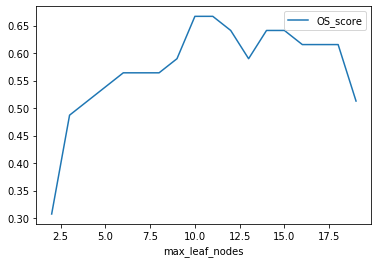

In [17]:
import matplotlib.pylab as plt

disease_tree.plot(kind = 'line',x = param,y = 'OS_score')
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = { param: leaf_range }
dt = DecisionTreeClassifier()
gr = GridSearchCV(dt, param_grid = param_grid, scoring='accuracy')
rs = gr.fit(x_train, y_train)

print ("Best score: ", rs.best_score_)
print ("Best params: ", rs.best_params_)
print ("OS Score: ", rs.score(x_test, y_test))
print ("IS Score: ", rs.score(x_train, y_train))

Best score:  0.6380116959064327
Best params:  {'max_leaf_nodes': 5}
OS Score:  0.5384615384615384
IS Score:  0.7802197802197802


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [19]:
from sklearn import tree
from graphviz import Source
from IPython.display import SVG

dt = DecisionTreeClassifier(max_leaf_nodes=5) 
dt.fit(x_train, y_train)

thestring = tree.export_graphviz(dt,
                 out_file = None,
                 feature_names = x_train.columns.values,  
                 class_names = dt.classes_,  
                 filled=True, 
                 rounded = True,  
                 special_characters = True,
                 impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")

dt_graph = Source(thestring) 
SVG(dt_graph.pipe(format='svg'))

print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="SustAccImprSanUrb <= 0.658, samples = 91, value = [27, 22, 20, 22], class = awful", fillcolor="#fdf6f1"] ;
1 [label="samples = 35, value = [26, 9, 0, 0], class = awful", fillcolor="#eead7e"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="SustAccImprSanRur <= 0.866, samples = 56, value = [1, 13, 20, 22], class = medium", fillcolor="#fdf4fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="AdultLtrcyRate <= 0.717, samples = 40, value = [1, 13, 6, 20], class = medium", fillcolor="#f5ccf8"] ;
2 -> 3 ;
5 [label="samples = 9, value = [1, 8, 0, 0], class = high", fillcolor="#5ee852"] ;
3 -> 5 ;
6 [label="GDPPCptaIntDol <= 2479.5, samples = 31, value = [0, 5, 6, 20], class = medium", fillcolor="#e990f0"] ;
3 -> 6 ;
7 [label="samples = 3, value = [0, 3, 0, 0], class = high", fillcolor="#47e539"] ;
6 -> 7 ;
8 [l

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest = RandomForestClassifier()
ft_grid = GridSearchCV(estimator = forest, 
                       param_grid = param_grid,
                       scoring = 'accuracy'
                      )

ft_tuned = ft_grid.fit(x_train, y_train.values.ravel())

print ("Best score: ", ft_tuned.best_score_)
print ("Best params: ", ft_tuned.best_params_)
print ("OS Score: ", ft_tuned.score(x_test, y_test))
print ("IS Score: ", ft_tuned.score(x_train, y_train))

Best score:  0.6818713450292397
Best params:  {'max_leaf_nodes': 4}
OS Score:  0.6153846153846154
IS Score:  0.8571428571428571


b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

**The decision tree classfier was barely more accurate than a coin toss on out-of-sample data after being tuned using GridSearchCV; however, the resulting decision tree -once visualized- is very easy to notice that the biggest predictors for disease are access to sanitation services. This is great to know if you plan to tackle the issue head on. But the random forest classifier was somewhat better than a coin toss on out-of-sample data, but for this improvement we lose clear visibility as to what factors have the biggest impact on the burden of disease.**